In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
s1_s2_pathways = pd.read_csv('./genecards/s1_s2_pathways.csv')
s2_s3_pathways = pd.read_csv('./genecards/s2_s3_pathways.csv')
s3_s4_pathways = pd.read_csv('./genecards/s3_s4_pathways.csv')

In [21]:
print(f's1_s2_pathways shape: {s1_s2_pathways.shape}')
print(f's2_s3_pathways shape: {s2_s3_pathways.shape}')
print(f's3_s4_pathways shape: {s3_s4_pathways.shape}')
print(f's1_s2_pathways columns: {s1_s2_pathways.columns}')
print(f's2_s3_pathways columns: {s2_s3_pathways.columns}')
print(f's3_s4_pathways columns: {s3_s4_pathways.columns}')

s1_s2_pathways shape: (20, 6)
s2_s3_pathways shape: (47, 6)
s3_s4_pathways shape: (20, 6)
s1_s2_pathways columns: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')
s2_s3_pathways columns: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')
s3_s4_pathways columns: Index(['Score', 'SuperPath Name', '# SuperPath Total Genes',
       '# SuperPath Matched Genes', 'Matched Genes (Symbols)', 'Evidence URL'],
      dtype='object')


In [22]:
print(f's1_s2_pathways head: {s1_s2_pathways.head()}')
print(f's2_s3_pathways head: {s2_s3_pathways.head()}')
print(f's3_s4_pathways head: {s3_s4_pathways.head()}')

s1_s2_pathways head:    Score                      SuperPath Name  # SuperPath Total Genes  \
0  14.16        LPA Receptor Mediated Events                       47   
1  10.83  Development EGFR Signaling Pathway                      154   
2  10.46                      Bladder Cancer                       40   
3   9.95               Sweet Taste Signaling                      365   
4   9.30                          Metabolism                     2127   

   # SuperPath Matched Genes  \
0                          4   
1                          5   
2                          3   
3                          7   
4                         19   

                             Matched Genes (Symbols)  \
0                           MMP2, MMP9, PIK3CB, EGFR   
1                     MMP2, MMP9, PIK3CB, RHOC, EGFR   
2                                   MMP2, MMP9, EGFR   
3    PTK7, TXK, STK35, PLA2G12A, MYO1F, PDE4C, KCNK6   
4  B3GAT2, NQO2, TYRP1, ISCA2, FAHD1, ENTPD4, PLA...   

          

In [36]:
# Set a higher threshold for significance
threshold = 6

# Identify common significant pathways
significant_s1_s2 = set(s1_s2_pathways[s1_s2_pathways['Score'] >= threshold]['SuperPath Name'])
significant_s2_s3 = set(s2_s3_pathways[s2_s3_pathways['Score'] >= threshold]['SuperPath Name'])
significant_s3_s4 = set(s3_s4_pathways[s3_s4_pathways['Score'] >= threshold]['SuperPath Name'])

print(f'Significant pathways in s1_s2: {significant_s1_s2}')
print(f'Significant pathways in s2_s3: {significant_s2_s3}')
print(f'Significant pathways in s3_s4: {significant_s3_s4}')

Significant pathways in s1_s2: {'Telomere Extension By Telomerase', 'Sweet Taste Signaling', 'LPA Receptor Mediated Events', 'NRP1-triggered Signaling Pathways in Pancreatic Cancer', 'A-beta Plaque Formation and APP Metabolism', 'Metabolism', 'Aryl Hydrocarbon Receptor Pathway', 'Bladder Cancer', 'Plasma Membrane Estrogen Receptor Signaling', 'Lung Fibrosis', 'Regulation of Nuclear Beta Catenin Signaling and Target Gene Transcription', 'Development EGFR Signaling Pathway', 'Head and Neck Squamous Cell Carcinoma', 'Erlotinib Pathway, Pharmacokinetics', 'Development Dopamine D2 Receptor Transactivation of EGFR', 'Cell Adhesion_ECM Remodeling', 'Extracellular Vesicles in The Crosstalk of Cardiac Cells', '2-oxobutanoate Degradation I', 'Colorectal Cancer Metastasis', 'Sulfur Amino Acid Metabolism'}
Significant pathways in s2_s3: {'Validated Transcriptional Targets of AP1 Family Members Fra1 and Fra2', 'Signal Transduction', 'Interleukin-4 and Interleukin-13 Signaling', 'IL-17 Family Signal

In [38]:

common_s1_s2_s2_s3 = significant_s1_s2.intersection(significant_s2_s3)
common_s2_s3_s3_s4 = significant_s2_s3.intersection(significant_s3_s4)
common_all = significant_s1_s2.intersection(significant_s2_s3).intersection(significant_s3_s4)

print(f'Common pathways between s1_s2 and s2_s3: {common_s1_s2_s2_s3}')
print(f'Common pathways between s2_s3 and s3_s4: {common_s2_s3_s3_s4}')
print(f'Common pathways across all stages: {common_all}')

# Track changes in score and number of genes matched
def track_changes(df, common_pathways, stage):
    df_common = df[df['SuperPath Name'].isin(common_pathways)].copy()
    df_common.set_index('SuperPath Name', inplace=True)
    df_common.rename(columns={'Score': f'Score_{stage}', '# SuperPath Matched Genes': f'Matched Genes_{stage}'}, inplace=True)
    return df_common

s1_s2_common = track_changes(s1_s2_pathways, common_s1_s2_s2_s3.union(common_all), 's1_s2')
s2_s3_common = track_changes(s2_s3_pathways, common_s1_s2_s2_s3.union(common_s2_s3_s3_s4).union(common_all), 's2_s3')
s3_s4_common = track_changes(s3_s4_pathways, common_s2_s3_s3_s4.union(common_all), 's3_s4')

print('s1_s2_common:')
print(s1_s2_common.head())
print('s2_s3_common:')
print(s2_s3_common.head())
print('s3_s4_common:')
print(s3_s4_common.head())

Common pathways between s1_s2 and s2_s3: {'Bladder Cancer', 'NRP1-triggered Signaling Pathways in Pancreatic Cancer', 'Lung Fibrosis', 'Regulation of Nuclear Beta Catenin Signaling and Target Gene Transcription', 'Colorectal Cancer Metastasis'}
Common pathways between s2_s3 and s3_s4: set()
Common pathways across all stages: set()
s1_s2_common:
                                                    Score_s1_s2  \
SuperPath Name                                                    
Bladder Cancer                                            10.46   
NRP1-triggered Signaling Pathways in Pancreatic...         9.30   
Lung Fibrosis                                              8.59   
Regulation of Nuclear Beta Catenin Signaling an...         8.06   
Colorectal Cancer Metastasis                               7.47   

                                                    # SuperPath Total Genes  \
SuperPath Name                                                                
Bladder Cancer           

In [39]:
# Merge the data for comparison
merged_common_scores = s1_s2_common[['Score_s1_s2']].merge(s2_s3_common[['Score_s2_s3']], left_index=True, right_index=True, how='outer')
merged_common_scores = merged_common_scores.merge(s3_s4_common[['Score_s3_s4']], left_index=True, right_index=True, how='outer')

merged_common_genes = s1_s2_common[['Matched Genes_s1_s2']].merge(s2_s3_common[['Matched Genes_s2_s3']], left_index=True, right_index=True, how='outer')
merged_common_genes = merged_common_genes.merge(s3_s4_common[['Matched Genes_s3_s4']], left_index=True, right_index=True, how='outer')

print('merged_common_scores:')
print(merged_common_scores.head())
print('merged_common_genes:')
print(merged_common_genes.head())

merged_common_scores:
                                                    Score_s1_s2  Score_s2_s3  \
SuperPath Name                                                                 
Bladder Cancer                                            10.46        12.23   
Colorectal Cancer Metastasis                               7.47        17.01   
Lung Fibrosis                                              8.59        19.82   
NRP1-triggered Signaling Pathways in Pancreatic...         9.30        15.88   
Regulation of Nuclear Beta Catenin Signaling an...         8.06        14.17   

                                                    Score_s3_s4  
SuperPath Name                                                   
Bladder Cancer                                              NaN  
Colorectal Cancer Metastasis                                NaN  
Lung Fibrosis                                               NaN  
NRP1-triggered Signaling Pathways in Pancreatic...          NaN  
Regulation of Nuclear

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


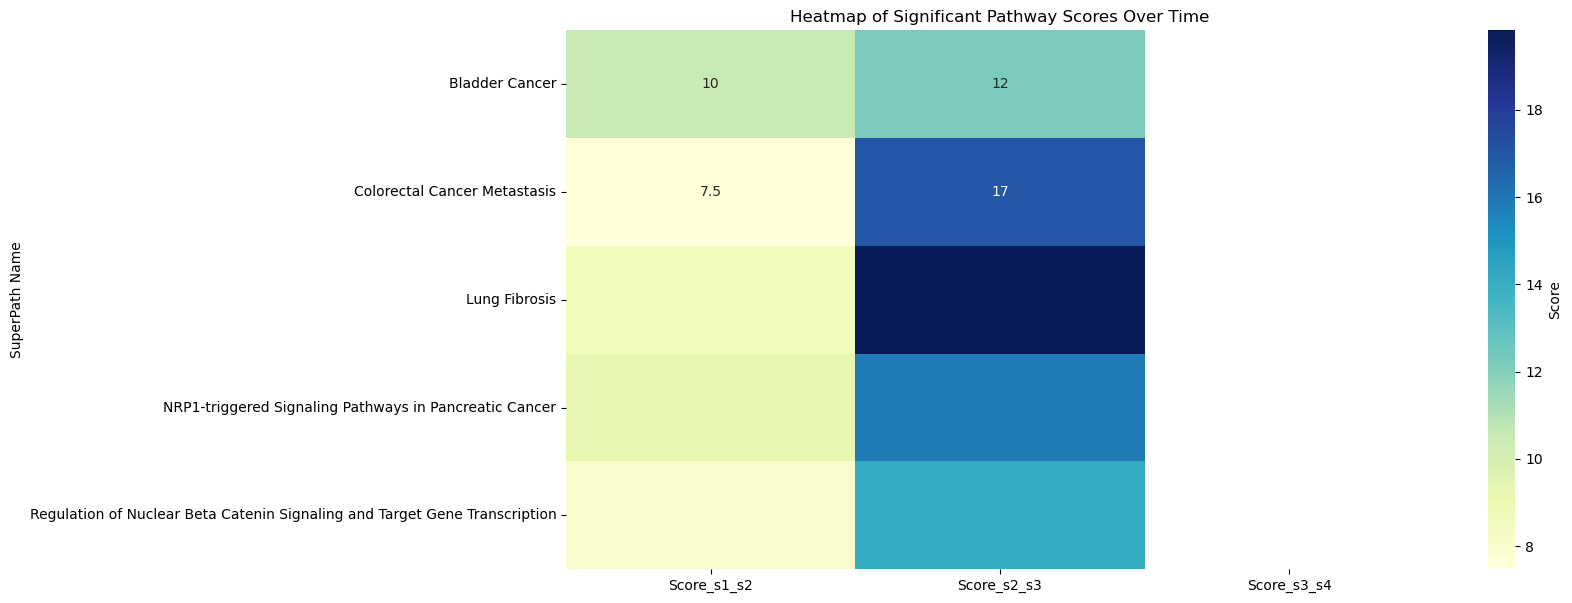

/Users/emmetthintz/miniconda3/envs/myenv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


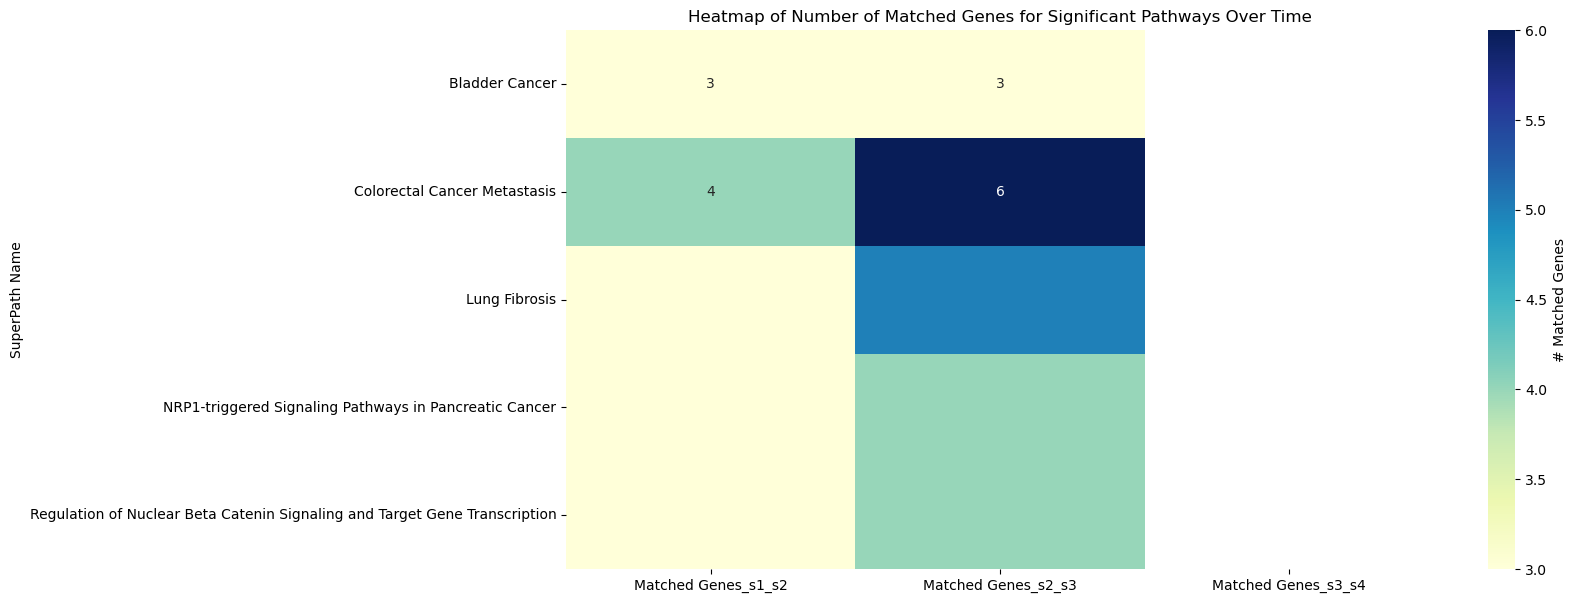

In [40]:
# Create heatmaps for significant pathways
if not merged_common_scores.empty:
    plt.figure(figsize=(14, 7))
    sns.heatmap(merged_common_scores, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Score'})
    plt.title('Heatmap of Significant Pathway Scores Over Time')
    plt.show()
else:
    print("No common significant pathways to display in heatmap for scores.")

if not merged_common_genes.empty:
    plt.figure(figsize=(14, 7))
    sns.heatmap(merged_common_genes, annot=True, cmap="YlGnBu", cbar_kws={'label': '# Matched Genes'})
    plt.title('Heatmap of Number of Matched Genes for Significant Pathways Over Time')
    plt.show()
else:
    print("No common significant pathways to display in heatmap for matched genes.")


In [41]:

# Identify new significant pathways
def new_significant_pathways(current_df, previous_df, threshold):
    new_pathways = set(current_df['SuperPath Name']) - set(previous_df['SuperPath Name'])
    significant_new_pathways = current_df[(current_df['SuperPath Name'].isin(new_pathways)) & (current_df['Score'] >= threshold)]
    return significant_new_pathways

new_significant_s2_s3 = new_significant_pathways(s2_s3_pathways, s1_s2_pathways, threshold)
new_significant_s3_s4 = new_significant_pathways(s3_s4_pathways, s2_s3_pathways, threshold)

print('New significant pathways in s2_s3:')
print(new_significant_s2_s3)
print('New significant pathways in s3_s4:')
print(new_significant_s3_s4)


New significant pathways in s2_s3:
    Score                                     SuperPath Name  \
0   26.31                            CCL18 Signaling Pathway   
1   20.50                        CKAP4 Signaling Pathway Map   
3   17.76                                      ERK Signaling   
4   17.21  Epithelial to Mesenchymal Transition in Colore...   
6   16.64                         Nervous System Development   
7   16.54                       Neural Crest Differentiation   
8   16.20  SARS-CoV-2 Innate Immunity Evasion and Cell-sp...   
11  13.99  Cells and Molecules Involved in Local Acute In...   
12  13.94                                 Burn Wound Healing   
13  13.84                                Signal Transduction   
14  13.74  Oligodendrocyte Specification and Differentiat...   
15  13.45                            Amb2 Integrin Signaling   
16  13.45  Sudden Infant Death Syndrome (SIDS) Susceptibi...   
17  13.02             Sertoli-Sertoli Cell Junction Dynamics   
18  1

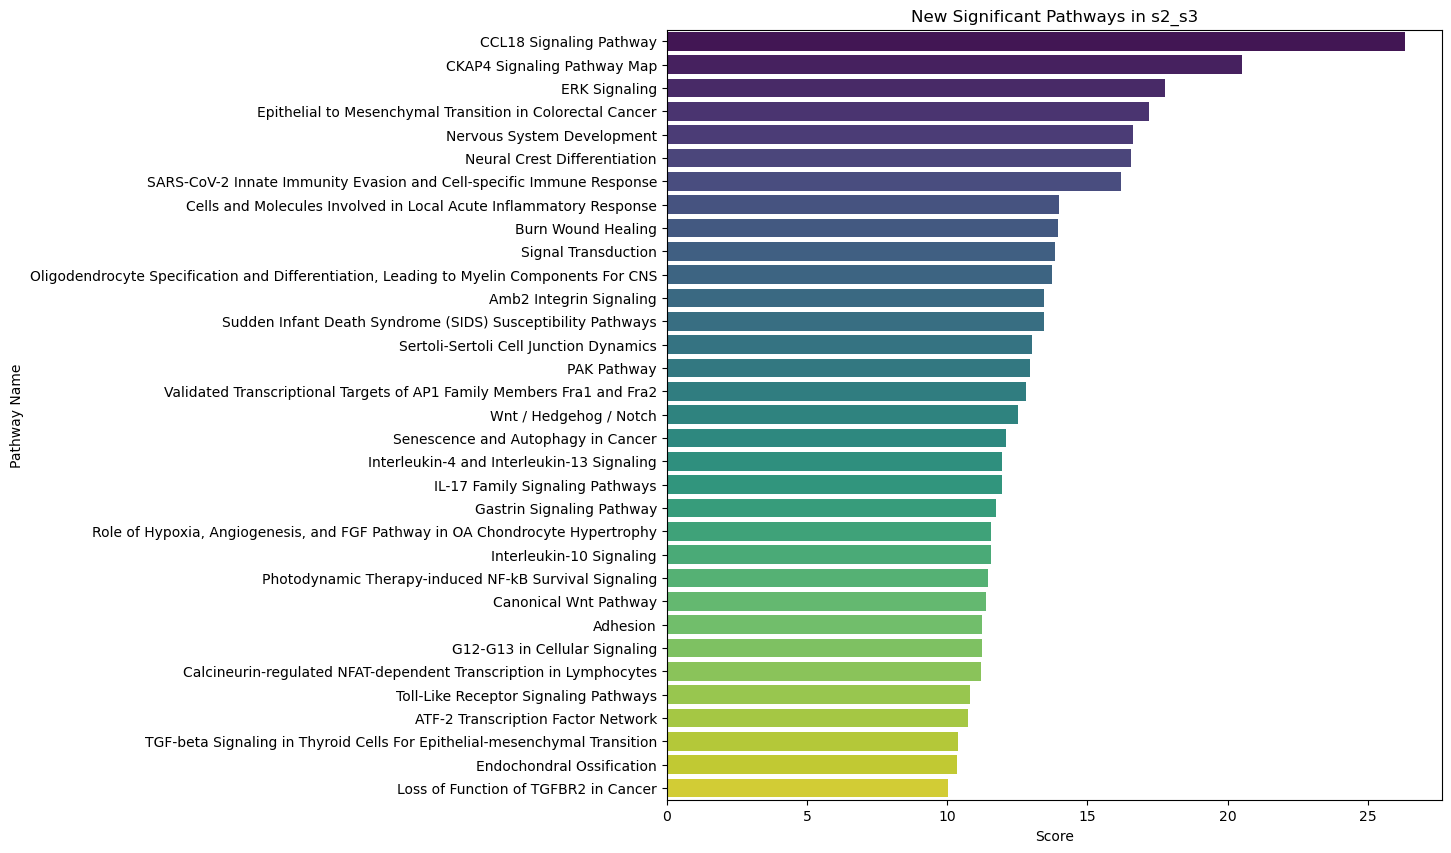

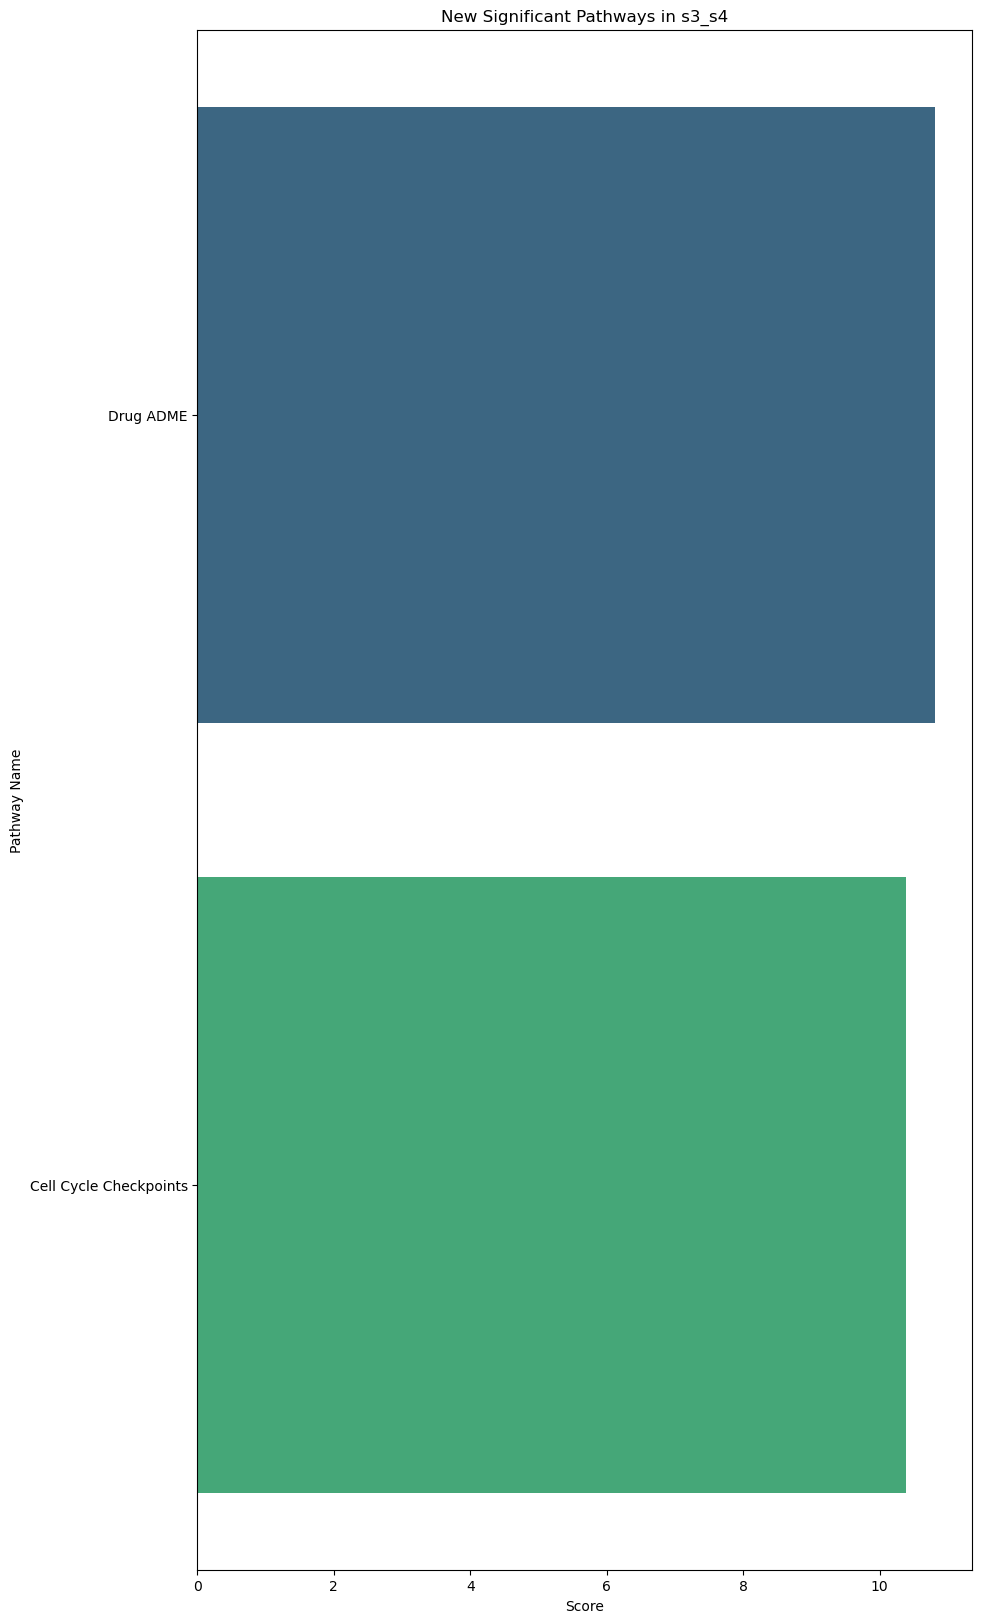

In [42]:
# Filter for more significant pathways
significant_threshold = 10
new_significant_s2_s3 = new_significant_s2_s3[new_significant_s2_s3['Score'] >= significant_threshold]
new_significant_s3_s4 = new_significant_s3_s4[new_significant_s3_s4['Score'] >= significant_threshold]

# Visualize new significant pathways
if not new_significant_s2_s3.empty:
    plt.figure(figsize=(10, 10))
    sns.barplot(data=new_significant_s2_s3, x='Score', y='SuperPath Name', palette='viridis')
    plt.title('New Significant Pathways in s2_s3')
    plt.xlabel('Score')
    plt.ylabel('Pathway Name')
    plt.show()
else:
    print("No new significant pathways to display for s2_s3.")

if not new_significant_s3_s4.empty:
    plt.figure(figsize=(10, 20))
    sns.barplot(data=new_significant_s3_s4, x='Score', y='SuperPath Name', palette='viridis')
    plt.title('New Significant Pathways in s3_s4')
    plt.xlabel('Score')
    plt.ylabel('Pathway Name')
    plt.show()
else:
    print("No new significant pathways to display for s3_s4.")

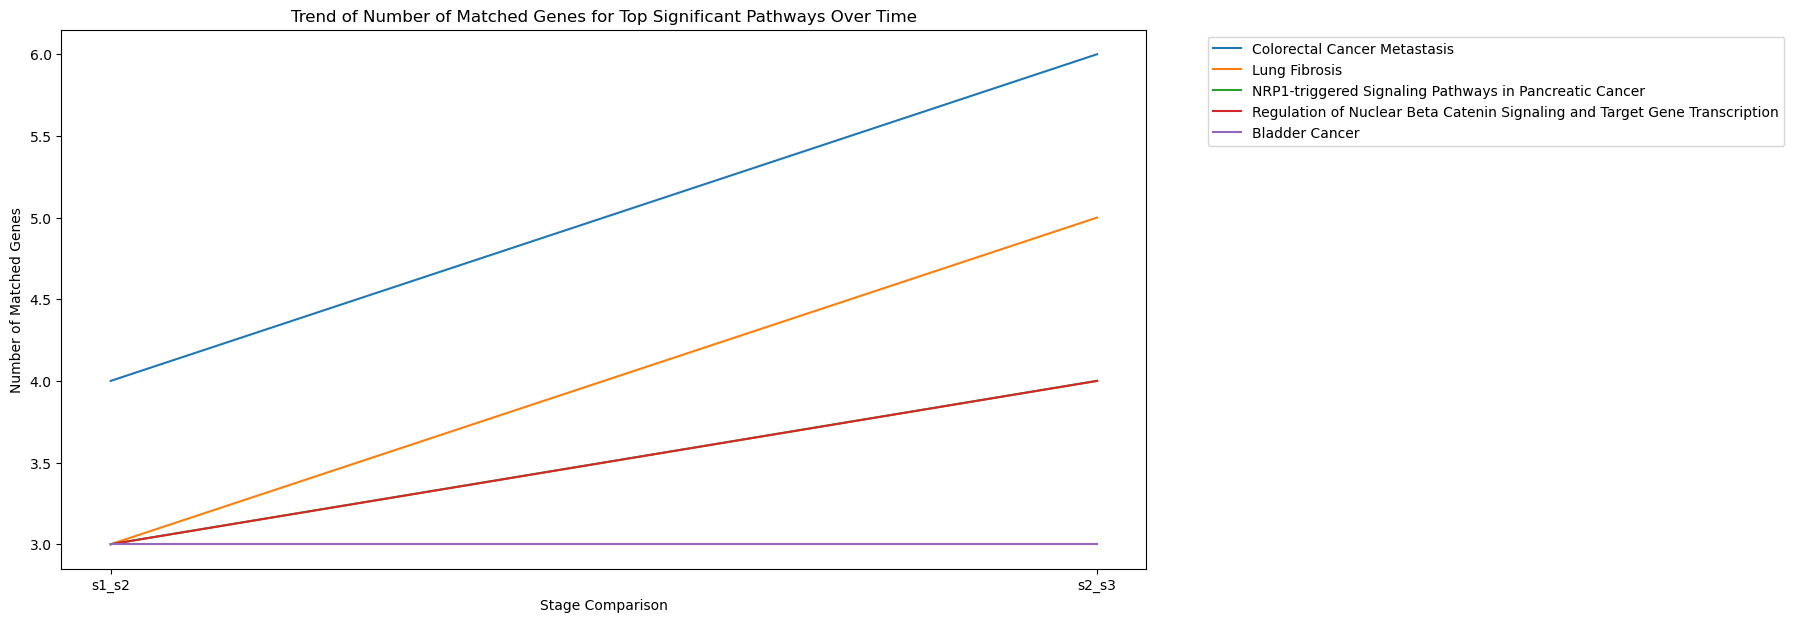

Trend of Number of Matched Genes for Top Significant Pathways Over Time:
Pathway: Colorectal Cancer Metastasis
  Matched Genes in s1_s2: 4
  Matched Genes in s2_s3: 6
  Matched Genes in s3_s4: N/A
  Change from s1_s2 to s2_s3: 2
  Change from s2_s3 to s3_s4: N/A
Pathway: Lung Fibrosis
  Matched Genes in s1_s2: 3
  Matched Genes in s2_s3: 5
  Matched Genes in s3_s4: N/A
  Change from s1_s2 to s2_s3: 2
  Change from s2_s3 to s3_s4: N/A
Pathway: NRP1-triggered Signaling Pathways in Pancreatic Cancer
  Matched Genes in s1_s2: 3
  Matched Genes in s2_s3: 4
  Matched Genes in s3_s4: N/A
  Change from s1_s2 to s2_s3: 1
  Change from s2_s3 to s3_s4: N/A
Pathway: Regulation of Nuclear Beta Catenin Signaling and Target Gene Transcription
  Matched Genes in s1_s2: 3
  Matched Genes in s2_s3: 4
  Matched Genes in s3_s4: N/A
  Change from s1_s2 to s2_s3: 1
  Change from s2_s3 to s3_s4: N/A
Pathway: Bladder Cancer
  Matched Genes in s1_s2: 3
  Matched Genes in s2_s3: 3
  Matched Genes in s3_s4: N/A


In [44]:
# Calculate the change in matched genes
if not merged_common_genes.empty:
    merged_common_genes['Change_s1_s2_to_s2_s3'] = merged_common_genes['Matched Genes_s2_s3'] - merged_common_genes['Matched Genes_s1_s2']
    merged_common_genes['Change_s2_s3_to_s3_s4'] = merged_common_genes['Matched Genes_s3_s4'] - merged_common_genes['Matched Genes_s2_s3']

    # Calculate the absolute changes and filter top significant changes
    merged_common_genes['Abs_Change_s1_s2_to_s2_s3'] = merged_common_genes['Change_s1_s2_to_s2_s3'].abs()
    merged_common_genes['Abs_Change_s2_s3_to_s3_s4'] = merged_common_genes['Change_s2_s3_to_s3_s4'].abs()

    # Select top pathways with the most significant changes
    top_pathways = merged_common_genes.nlargest(30, ['Abs_Change_s1_s2_to_s2_s3', 'Abs_Change_s2_s3_to_s3_s4'])

    # Plot the trends using line plots for top significant changes
    plt.figure(figsize=(14, 7))
    for pathway in top_pathways.index:
        plt.plot(['s1_s2', 's2_s3', 's3_s4'], top_pathways.loc[pathway, ['Matched Genes_s1_s2', 'Matched Genes_s2_s3', 'Matched Genes_s3_s4']], label=pathway)
    plt.xlabel('Stage Comparison')
    plt.ylabel('Number of Matched Genes')
    plt.title('Trend of Number of Matched Genes for Top Significant Pathways Over Time')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Print the changes in text
    print("Trend of Number of Matched Genes for Top Significant Pathways Over Time:")
    for pathway in top_pathways.index:
        matched_genes_s1_s2 = merged_common_genes.loc[pathway, 'Matched Genes_s1_s2'] if 'Matched Genes_s1_s2' in merged_common_genes.columns else None
        matched_genes_s2_s3 = merged_common_genes.loc[pathway, 'Matched Genes_s2_s3'] if 'Matched Genes_s2_s3' in merged_common_genes.columns else None
        matched_genes_s3_s4 = merged_common_genes.loc[pathway, 'Matched Genes_s3_s4'] if 'Matched Genes_s3_s4' in merged_common_genes.columns else None
        
        change_s1_s2_to_s2_s3 = matched_genes_s2_s3 - matched_genes_s1_s2 if pd.notnull(matched_genes_s1_s2) and pd.notnull(matched_genes_s2_s3) else 'N/A'
        change_s2_s3_to_s3_s4 = matched_genes_s3_s4 - matched_genes_s2_s3 if pd.notnull(matched_genes_s2_s3) and pd.notnull(matched_genes_s3_s4) else 'N/A'
        
        print(f"Pathway: {pathway}")
        print(f"  Matched Genes in s1_s2: {matched_genes_s1_s2 if pd.notnull(matched_genes_s1_s2) else 'N/A'}")
        print(f"  Matched Genes in s2_s3: {matched_genes_s2_s3 if pd.notnull(matched_genes_s2_s3) else 'N/A'}")
        print(f"  Matched Genes in s3_s4: {matched_genes_s3_s4 if pd.notnull(matched_genes_s3_s4) else 'N/A'}")
        print(f"  Change from s1_s2 to s2_s3: {change_s1_s2_to_s2_s3}")
        print(f"  Change from s2_s3 to s3_s4: {change_s2_s3_to_s3_s4}")
else:
    print("No common significant pathways to analyze for matched genes.")
